In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
data=pd.read_csv('/Users/deekshithlabba/Documents/100 days of ML/behavioural_dataset.csv')

In [44]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [20]:
# import necessary libraries for clustering
from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
from mpl_toolkits.mplot3d import Axes3D

In [21]:
# checking whether the dataset has any empty cells
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [22]:
data.shape

(99, 8)

In [45]:
# considering personal loan as car loan and the price column indicates ev price
data.rename(columns={'Personal loan':'Car_Loan','Price':'EV_Price'},inplace=True)

In [46]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


<Axes: xlabel='Car_Loan', ylabel='count'>

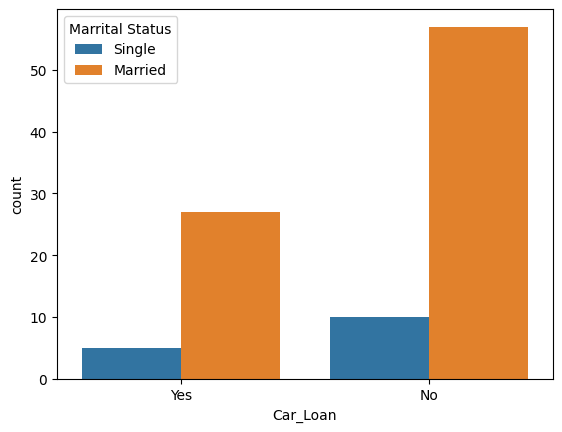

In [48]:
sns.countplot(x=data['Car_Loan'],hue=data['Marrital Status'])

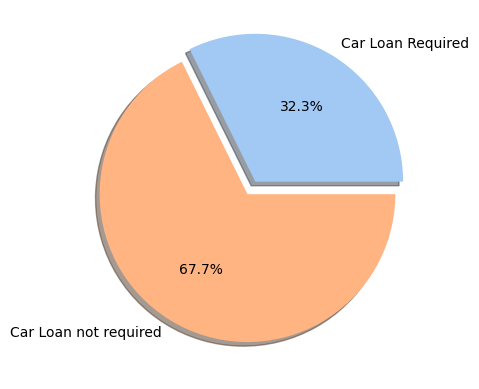

In [50]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [data.query('Car_Loan == "Yes"').Car_Loan.count(),data.query('Car_Loan == "No"').Car_Loan.count()]

explode = [0.1, 0]
palette_color = sns.color_palette('pastel')

plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')

plt.show()

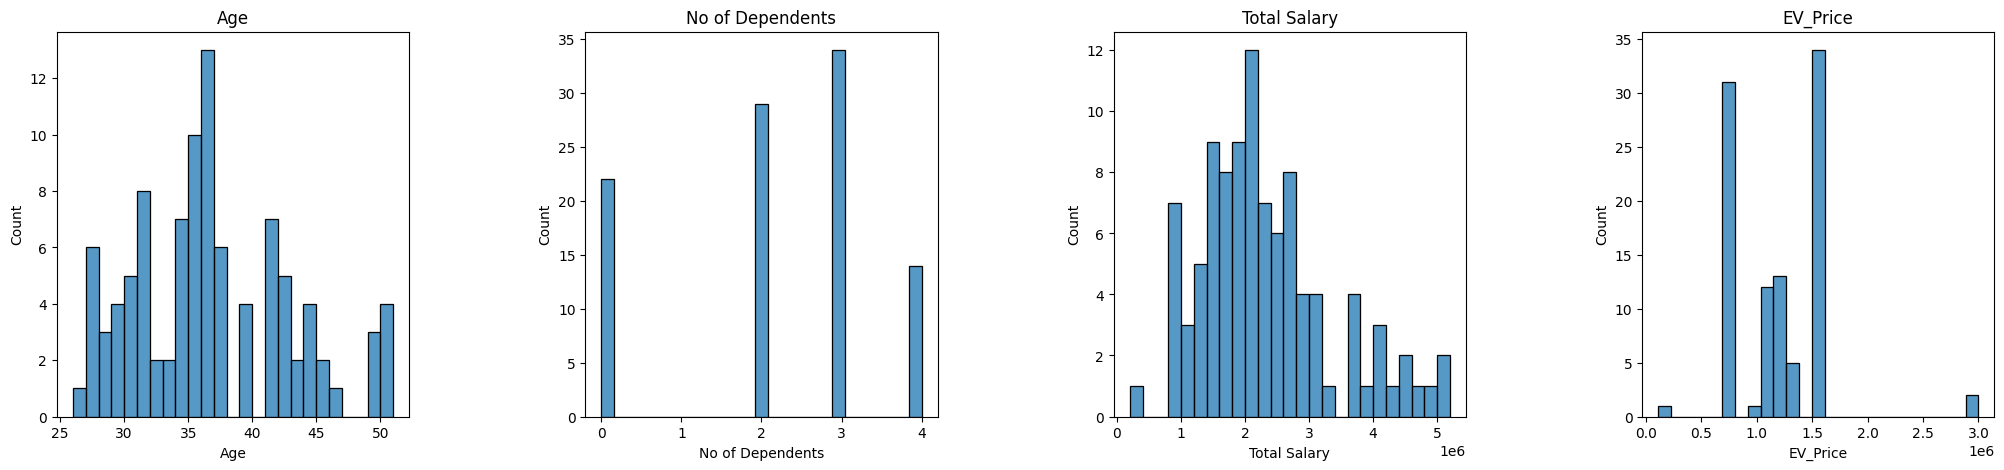

In [52]:
plt.figure(1, figsize=(25,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [53]:
cluster_features = list(data.columns)
cluster_data = data[cluster_features].values

In [55]:
cluster_data

array([[27, 'Salaried', 'Single', 'Post Graduate', 0, 'Yes', 800000,
        800000],
       [35, 'Salaried', 'Married', 'Post Graduate', 2, 'Yes', 2000000,
        1000000],
       [45, 'Business', 'Married', 'Graduate', 4, 'Yes', 1800000,
        1200000],
       [41, 'Business', 'Married', 'Post Graduate', 3, 'No', 2200000,
        1200000],
       [31, 'Salaried', 'Married', 'Post Graduate', 2, 'Yes', 2600000,
        1600000],
       [28, 'Salaried', 'Married', 'Graduate', 3, 'Yes', 900000, 700000],
       [31, 'Salaried', 'Married', 'Graduate', 4, 'No', 1800000, 1200000],
       [33, 'Business', 'Married', 'Post Graduate', 4, 'No', 1400000,
        700000],
       [34, 'Business', 'Married', 'Post Graduate', 4, 'No', 2000000,
        1100000],
       [34, 'Salaried', 'Married', 'Graduate', 3, 'Yes', 1900000, 800000],
       [35, 'Salaried', 'Married', 'Post Graduate', 4, 'No', 2000000,
        1600000],
       [35, 'Salaried', 'Married', 'Graduate', 4, 'Yes', 1400000, 700000],
  

In [56]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

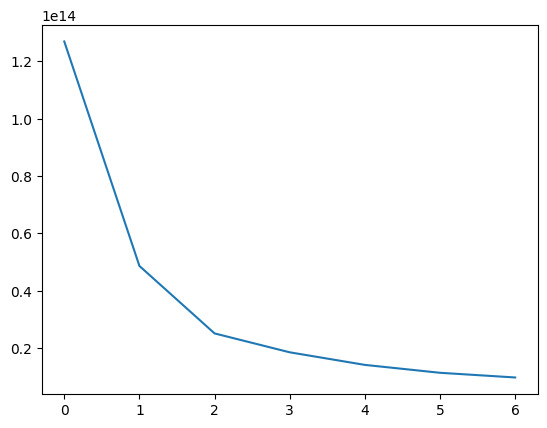

In [57]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [58]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 6, ncost: 48777842651066.98
Run: 1, iteration: 2/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 29, ncost: 60049361834687.586
Run: 2, iteration: 2/20, moves: 19, ncost: 50447073534650.24
Run: 2, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 2, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 3, ncost: 49051024054045.22
Run: 3, iteration: 2/20, moves: 3, ncost: 48631729380526.18
Run: 3, iteration: 3/20, moves: 0, ncost: 48631729380526.18
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

In [59]:
data['Cluster'] = clusters

In [60]:
data.EV_Price.mean()

1194040.4040404041

In [62]:
data.EV_Price[data.Cluster==0].mean()

1632142.857142857

In [63]:
print("Max EV price: ",data['EV_Price'][data.Cluster==1].max())
print("Mean ",data.EV_Price[data.Cluster==1].mean())
data['Cluster'].value_counts(normalize=True) * 100

Max EV price:  1600000
Mean  1021267.6056338028


Cluster
1    71.717172
0    28.282828
Name: proportion, dtype: float64

In [64]:
# Segregrating each cluster

Cluster_0 = data[data.Cluster==0]
Cluster_1 = data[data.Cluster==1]

In [65]:
data['Cluster'].value_counts()

Cluster
1    71
0    28
Name: count, dtype: int64

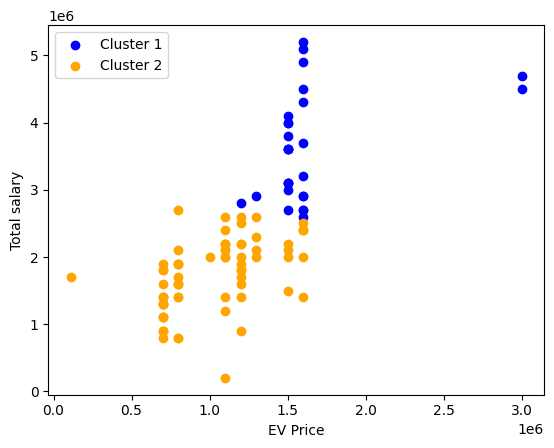

In [66]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='blue', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='orange', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

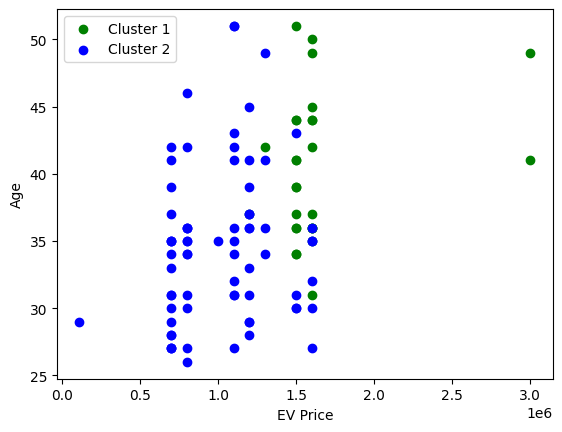

In [67]:
plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='green', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='blue', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

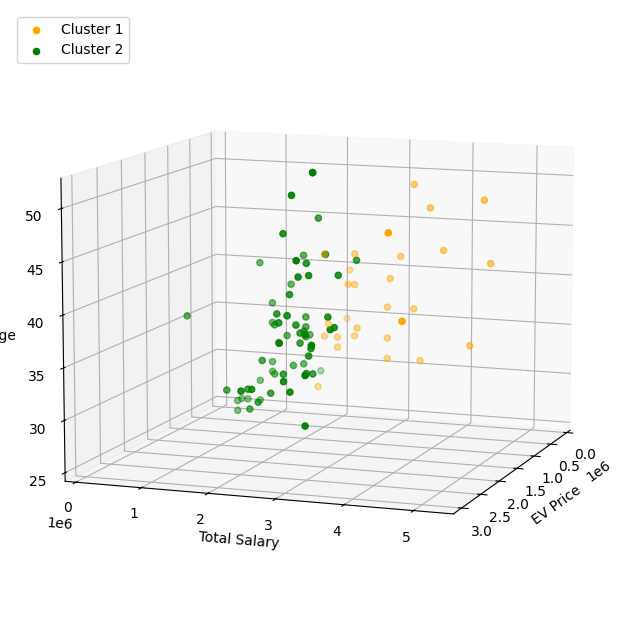

In [68]:
# plotting influence of age

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='orange', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

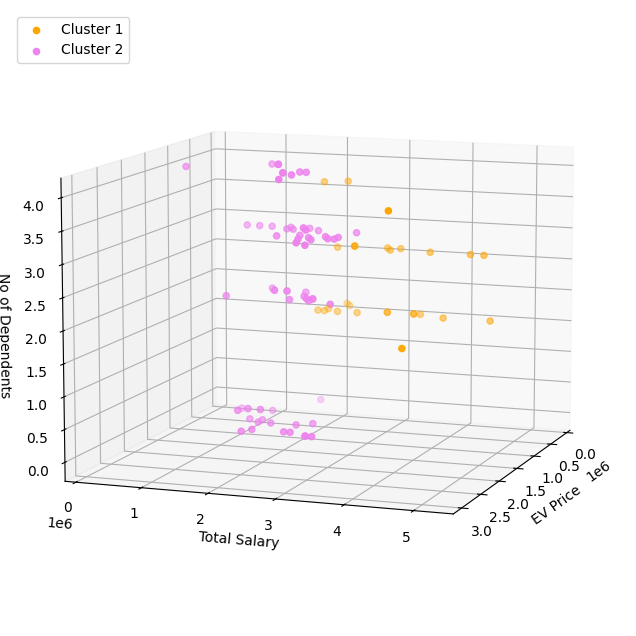

In [69]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='orange', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='violet', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

In [70]:
data['No of Dependents'].value_counts()

No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64

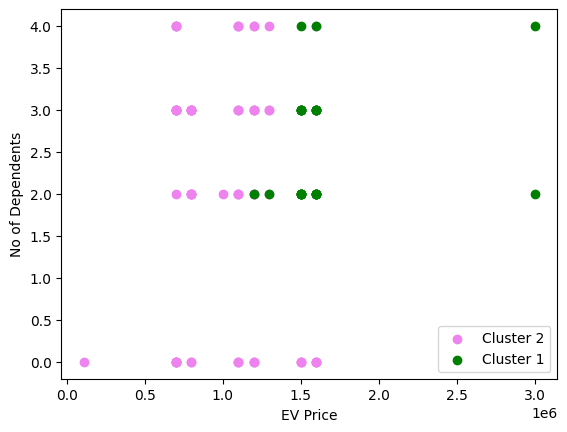

In [71]:
# plotting the effct of no of dependents and ev price on cluster data


plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='violet', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='green', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

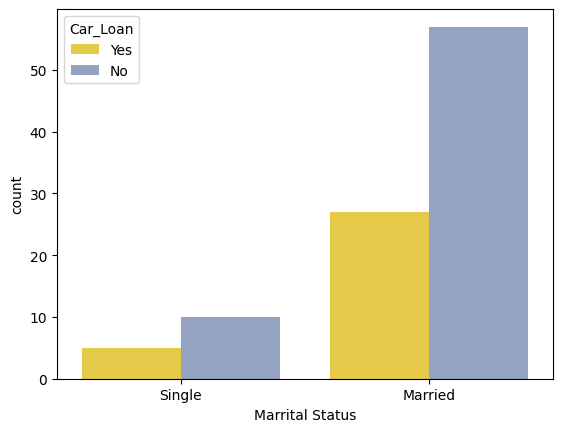

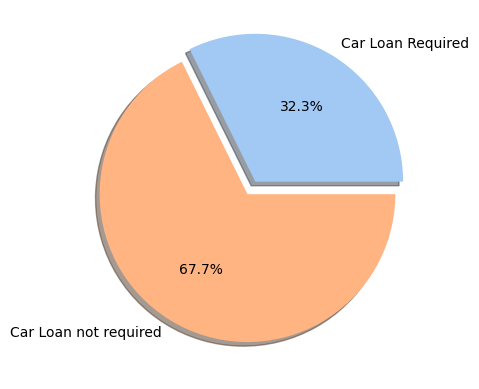

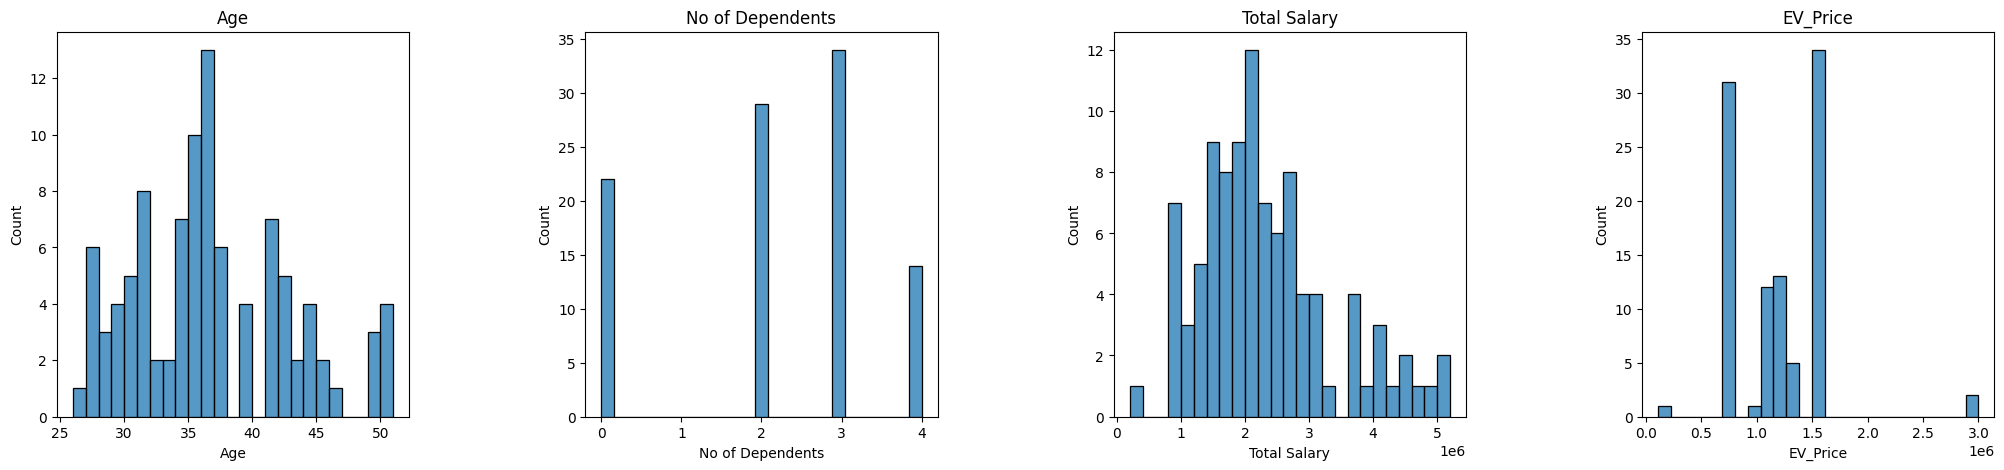

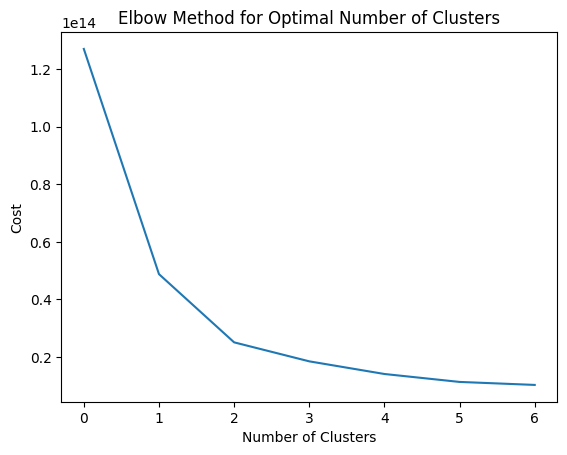

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 5, ncost: 48631729380526.18
Run: 1, iteration: 2/20, moves: 0, ncost: 48631729380526.18
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 22, ncost: 59534589041758.66
Run: 2, iteration: 2/20, moves: 18, ncost: 50447073534650.24
Run: 2, iteration: 3/20, moves: 3, ncost: 50057040964014.66
Run: 2, iteration: 4/20, moves: 1, ncost: 50020391397205.32
Run: 2, iteration: 5/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 11, ncost: 50528143911238.56
Run: 3, iteration: 2/20, moves: 5, ncost: 48837287201079.53
Run: 3, iteration: 3/20, moves: 1, ncost: 48777842651066.98
Run: 3, iteration: 4/20, moves: 0, ncost: 48777842651066.98
Init: initializing ce

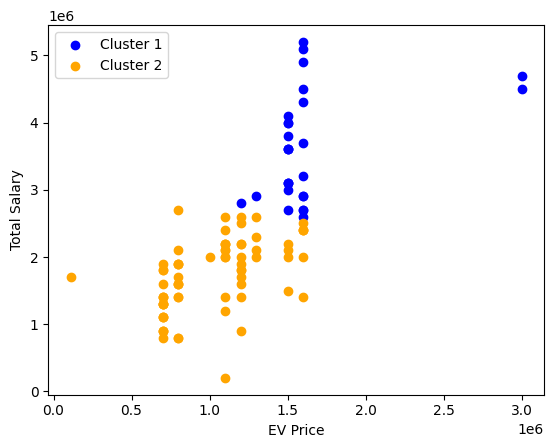

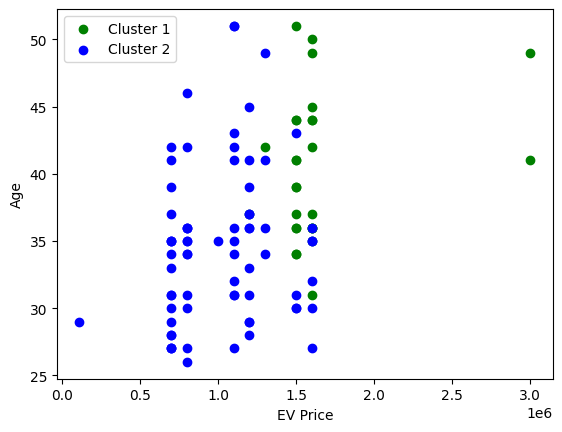

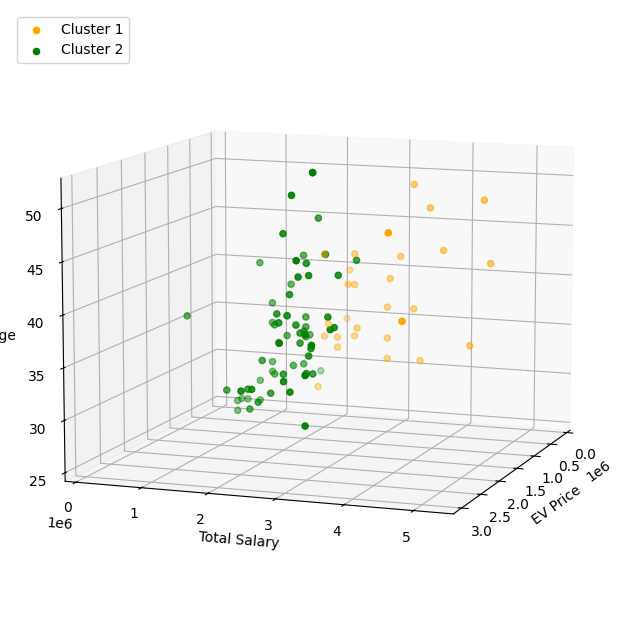

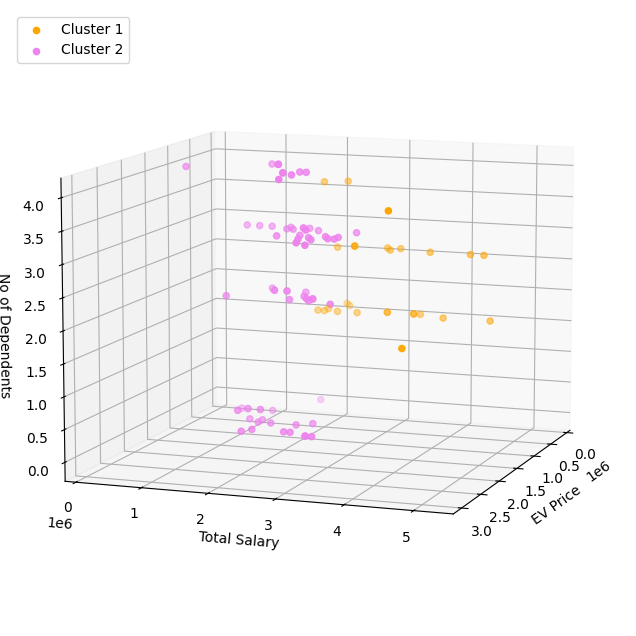

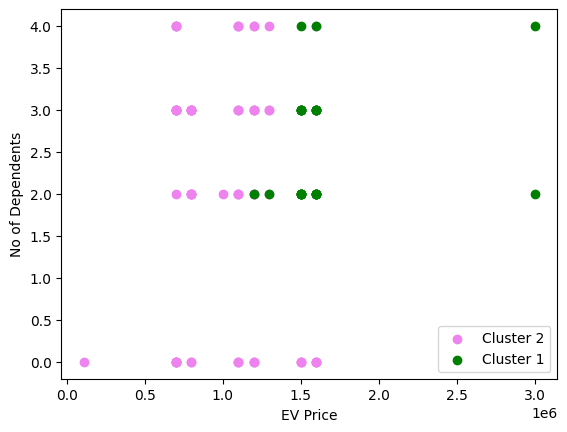

In [73]:

# Import libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
from mpl_toolkits.mplot3d import Axes3D
from kmodes.kprototypes import KPrototypes

warnings.filterwarnings("ignore")

# Load the dataset
beh_data = pd.read_csv("/Users/deekshithlabba/Documents/100 days of ML/behavioural_dataset.csv")

# Display the first few rows
beh_data.head()

# Display shape of the dataset
beh_data.shape

# Display column names
beh_data.columns

# Check for missing values
beh_data.isnull().sum()

# Rename columns for clarity
beh_data.rename(columns={'Personal loan':'Car_Loan'}, inplace=True)
beh_data.rename(columns={'Price':'EV_Price'}, inplace=True)
beh_data.head()

# Visualizations
sns.countplot(x='Marrital Status', hue='Car_Loan', data=beh_data, palette='Set2_r')
plt.show()

labels = ['Car Loan Required', 'Car Loan not required']
Loan_status = [beh_data.query('Car_Loan == "Yes"').Car_Loan.count(), beh_data.query('Car_Loan == "No"').Car_Loan.count()]

explode = [0.1, 0]
palette_color = sns.color_palette('pastel')

plt.pie(Loan_status, labels=labels, colors=palette_color, shadow=True, explode=explode, autopct='%1.1f%%')
plt.show()

plt.figure(1, figsize=(25, 5))
n = 0

for x in ['Age', 'No of Dependents', 'Total Salary', 'EV_Price']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(beh_data[x], bins=25)
    plt.title(f'{x}')
plt.show()

# Prepare data for clustering
cluster_features = list(beh_data.columns)
cluster_data = beh_data[cluster_features].values

cluster_data[0:3]

# Convert relevant columns to float
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

# Finding optimal number of clusters for KPrototypes
cost = []
for num_clusters in list(range(1, 8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1, 2, 3, 5])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Fit data to clusters
kproto = KPrototypes(n_clusters=2, verbose=2, max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1, 2, 3, 5])

# Add cluster labels to the original DataFrame
beh_data['Cluster'] = clusters

# Cluster analysis
print("Overall mean EV price:", beh_data.EV_Price.mean())
print("Cluster 0 mean EV price:", beh_data.EV_Price[beh_data.Cluster == 0].mean())
print("Cluster 1 mean EV price:", beh_data.EV_Price[beh_data.Cluster == 1].mean())
print("Cluster 1 max EV price:", beh_data['EV_Price'][beh_data.Cluster == 1].max())
print("Cluster 1 mean EV price:", beh_data.EV_Price[beh_data.Cluster == 1].mean())
print("Cluster distribution (%):")
print(beh_data['Cluster'].value_counts(normalize=True) * 100)

# Segregate each cluster
Cluster_0 = beh_data[beh_data.Cluster == 0]
Cluster_1 = beh_data[beh_data.Cluster == 1]

# Scatter plots to visualize clusters
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], color='blue', label='Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'], color='orange', label='Cluster 2')
plt.legend(loc="upper left")
plt.xlabel('EV Price')
plt.ylabel('Total Salary')
plt.show()

plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'], color='green', label='Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'], color='blue', label='Cluster 2')
plt.legend(loc="upper left")
plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

# 3D plot for Age influence
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='orange', label='Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'], Cluster_1['Age'], color='green', label='Cluster 2')
plt.legend(loc='upper left')
ax.view_init(10, 20)
plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

# 3D plot for No of Dependents influence
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='orange', label='Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'], Cluster_1['No of Dependents'], color='violet', label='Cluster 2')
plt.legend(loc='upper left')
ax.view_init(10, 20)
plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()

# Scatter plot for No of Dependents and EV Price
plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'], color='violet', label='Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'], color='green', label='Cluster 1')
plt.legend(loc="lower right")
plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()
